## 1. Создать таблицы со следующими структурами и загрузить данные из csv-файлов. 
Скрипты:

In [ ]:
create table customers_table(
	customer_id	int,
	first_name varchar,
	last_name varchar,
	gender varchar,
	DOB date,
	job_title varchar,
	job_industry_category varchar,
	wealth_segment varchar,
	deceased_indicator varchar,
	owns_car varchar,
	address varchar,
	postcode int,
	state varchar,
	country varchar,
	property_valuation int
);

select * from customers_table ct;

create table transactions_table(
	transaction_id int,
	product_id int,
	customer_id	int,
	transaction_date date,
	online_order bool,
	order_status varchar,
	brand varchar,
	product_line varchar, 
	product_class varchar,
	product_size varchar,
	list_price float,
	standard_cost float
);

select * from transactions_table tt;

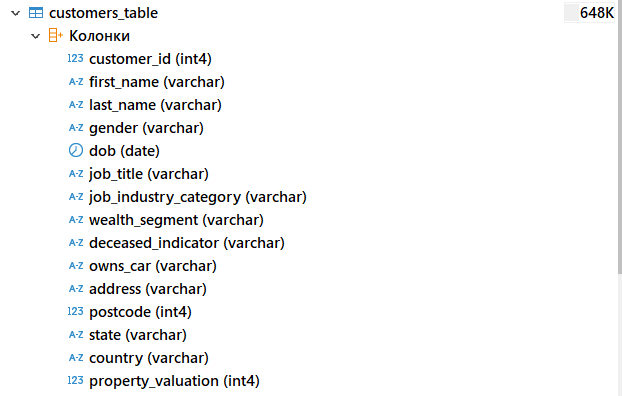
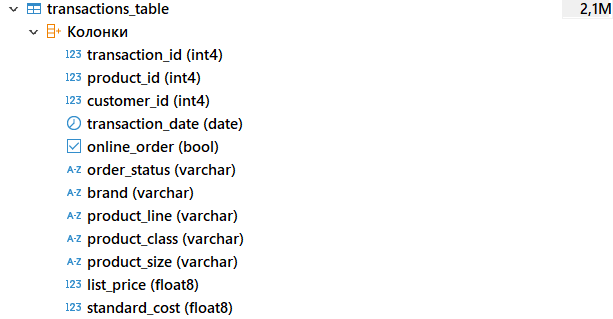
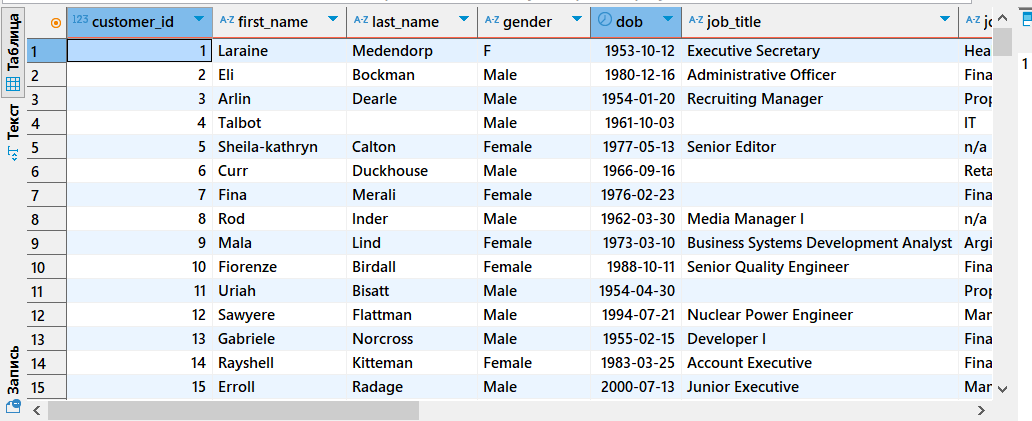
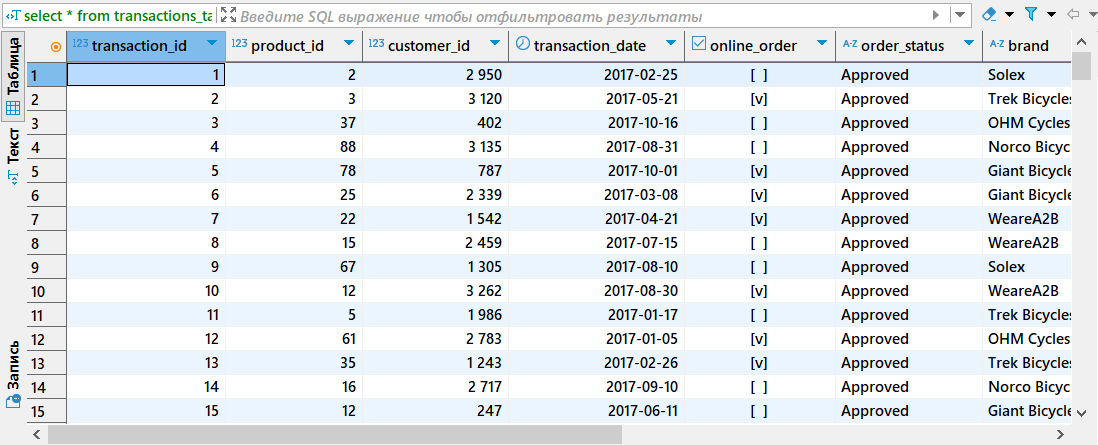

## 2.

### Вывести распределение (количество) клиентов по сферам деятельности, отсортировав результат по убыванию количества. — (1 балл)

In [ ]:
select job_industry_category, count(job_industry_category) as distribution from customers_table_3hw cth 
group by job_industry_category
order by distribution desc;

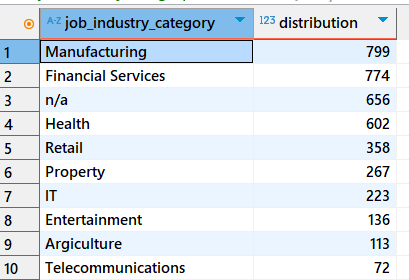

### Найти сумму транзакций за каждый месяц по сферам деятельности, отсортировав по месяцам и по сфере деятельности. — (1 балл)

In [ ]:
select cth.job_industry_category, date_trunc('month', tth.transaction_date) as month, sum(list_price)
from transactions_table_3hw tth 
join customers_table_3hw cth on tth.customer_id = cth.customer_id 
group by cth.job_industry_category, month
order by month, cth.job_industry_category ;

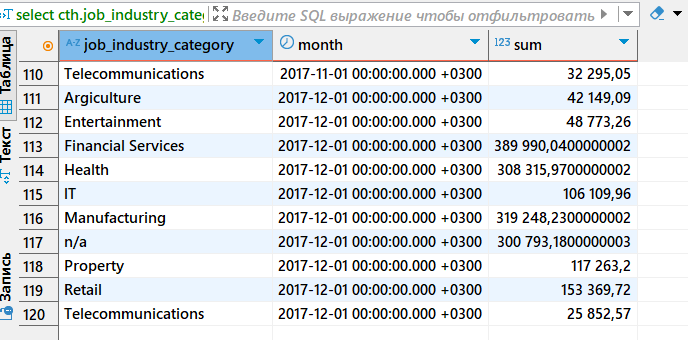

### Вывести количество онлайн-заказов для всех брендов в рамках подтвержденных заказов клиентов из сферы IT. — (1 балл)

In [ ]:
select brand, count(transaction_id) 
from transactions_table_3hw tth 
join customers_table_3hw cth on cth.customer_id = tth.customer_id 
where tth.online_order = true 
and cth.job_industry_category = 'IT'
and tth.order_status = 'Approved'
group by brand;

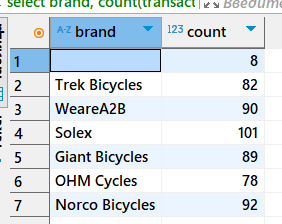

### Найти по всем клиентам сумму всех транзакций (list_price), максимум, минимум и количество транзакций, отсортировав результат по убыванию суммы транзакций и количества клиентов. Выполните двумя способами: используя только group by и используя только оконные функции. Сравните результат. — (2 балла)

In [ ]:
# Group by
select customer_id, 
	max(tth.list_price) as maximum, 
	min(tth.list_price) as minimum,
	sum(tth.list_price) as sum,
	count(tth.list_price) as count from transactions_table_3hw tth 
group by customer_id
order by sum desc, customer_id;

# Оконные функции
select customer_id,
	max(tth.list_price) over (partition by customer_id),
	min(tth.list_price) over (partition by customer_id),
	sum(tth.list_price) over (partition by customer_id) as sum,
	count(tth.list_price) over (partition by customer_id) from transactions_table_3hw tth
order by sum desc, customer_id;

Group by
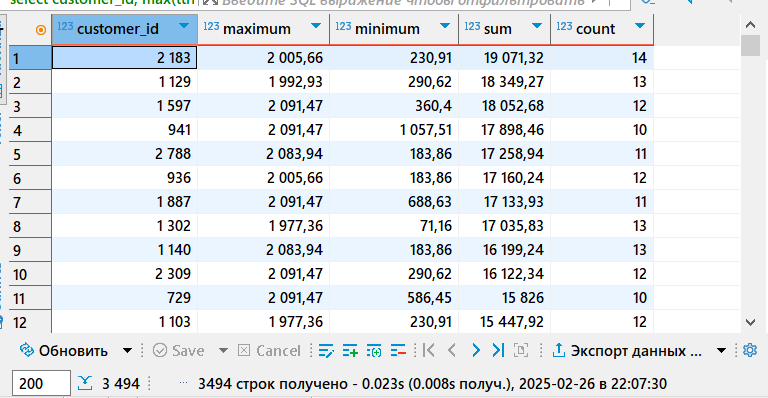

Оконные функции
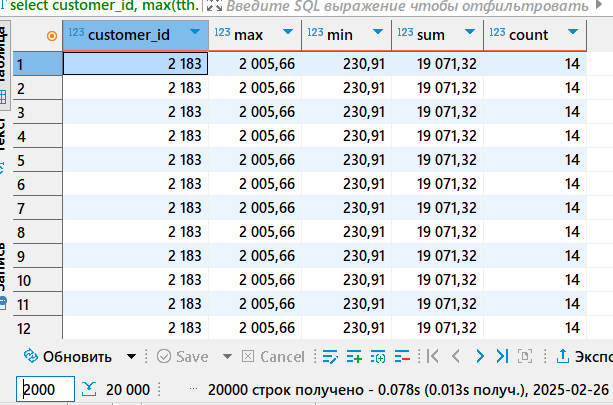

В group by по одной строке на id, в оконных функциях по count раз на id

### Найти имена и фамилии клиентов с минимальной/максимальной суммой транзакций за весь период (сумма транзакций не может быть null). Напишите отдельные запросы для минимальной и максимальной суммы. — (2 балла)

In [ ]:
select cth.first_name, cth.last_name, sum(tth.list_price)
from customers_table_3hw cth 
	join transactions_table_3hw tth on cth.customer_id = tth.customer_id
	group by cth.first_name, cth.last_name
	having sum(tth.list_price) = (select max(summa) 
			from (select sum(tth.list_price) as summa from transactions_table_3hw tth
			group by tth.customer_id)) 
		or
			sum(tth.list_price) = (select min(summa) 
			from (select sum(tth.list_price) as summa from transactions_table_3hw tth
			group by tth.customer_id));

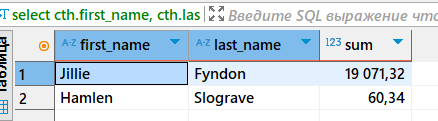

### Вывести только самые первые транзакции клиентов. Решить с помощью оконных функций. — (1 балл)

In [ ]:
select customer_id, transaction_id,
	min(tth.transaction_date) over (partition by customer_id)
	from transactions_table_3hw tth;

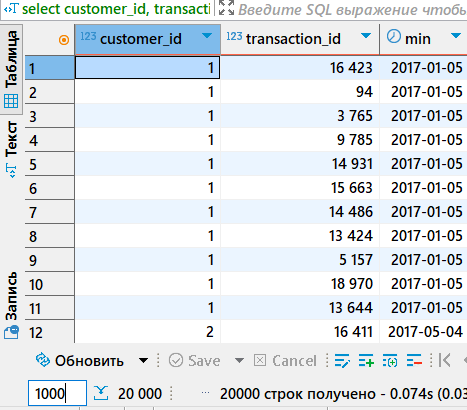

### Вывести имена, фамилии и профессии клиентов, между транзакциями которых был максимальный интервал (интервал вычисляется в днях) — (2 балла).

In [ ]:
select 
	cth.first_name, 
	cth.last_name, 
	cth.job_title, 
	max(tth.transaction_date)-min(tth.transaction_date) as most_diff
from customers_table_3hw cth 
	join transactions_table_3hw tth on cth.customer_id = tth.customer_id
group by cth.first_name, cth.last_name, cth.job_title
having max(tth.transaction_date)-min(tth.transaction_date) = 
	(select max(diff) from 
		(select cth.first_name, 
			cth.last_name, 
			cth.job_title, 
			max(tth.transaction_date)-min(tth.transaction_date) as diff
		from customers_table_3hw cth 
			join transactions_table_3hw tth on cth.customer_id = tth.customer_id
		group by cth.first_name, cth.last_name, cth.job_title) as t);

*p.s Интересно как это красивее решить, потому что верно, конечно, но явно перемудрено.*

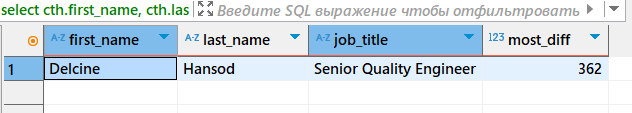